<a href="https://colab.research.google.com/github/shadab4150/Deep-Learning-Classifiers/blob/master/comparing_activation_function_ReLU_vs_Mish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>6 Different types of Activation function</h1></center>

In [0]:
from numpy import exp,log,tanh,linspace,sin
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set_style('whitegrid')

In [0]:
def mish(x):
    act = x*tanh(log(1+exp(x)))
    return act   
def relu(x):
    return max(0,x)
def sigmoid(x):
    sg = 1/(1+exp(-x))
    return sg
def swish(x):
    return x*sigmoid(x)
def leakyRelu(x):
    return max(0.1*x,x)
    

In [0]:
x = linspace(-10,10,10000)
y = mish(x)
y1 = sigmoid(x)
y2 = [relu(i) for i in x]
y4 = tanh(x)
y5 = swish(x)
y6 = [leakyRelu(i) for i in x]

<center><h1>Plotting 6 Different types of Activation function</h1></center>

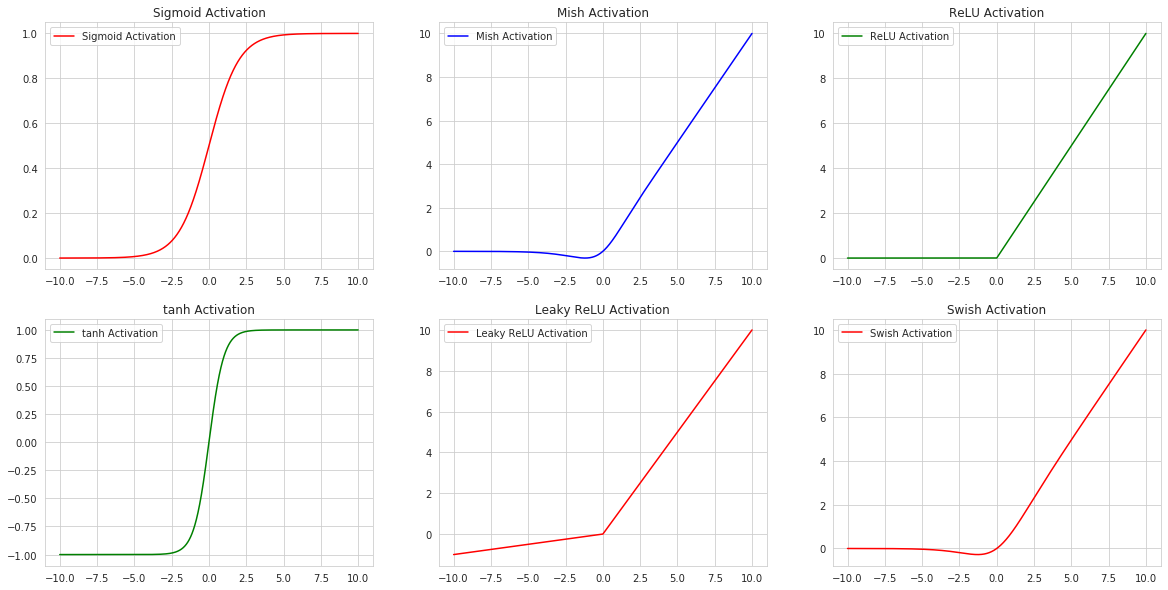

In [149]:
plt.figure(1,figsize=(20,10))
plt.subplot(231)
sns.lineplot(x=x,y=y1,color='red',label='Sigmoid Activation')
plt.title('Sigmoid Activation')
plt.subplot(232)
sns.lineplot(x=x,y=y,color='blue',label='Mish Activation')
#sns.lineplot(x=x,y=y5,color='red',label='Swish Activation')
plt.title('Mish Activation')
plt.subplot(233)
sns.lineplot(x=x,y=y2,color='green',label='ReLU Activation')
plt.title('ReLU Activation')
plt.subplot(234)
sns.lineplot(x=x,y=y4,color='green',label='tanh Activation')
plt.title('tanh Activation')
plt.subplot(236)
sns.lineplot(x=x,y=y5,color='red',label='Swish Activation')
#sns.lineplot(x=x,y=y,color='blue',label='Mish Activation')
plt.title('Swish Activation')
plt.subplot(235)
sns.lineplot(x=x,y=y6,color='red',label='Leaky ReLU Activation')
plt.title('Leaky ReLU Activation')
plt.savefig('act.png')
plt.show()

# Lets build a model to see the difference

In [0]:
import cv2
from tqdm import tqdm_notebook as tqdm
import zipfile
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [0]:
!unzip '/content/train.zip' -d '/content/mnist/'

In [0]:
from fastai.vision import *

In [0]:
label = pd.read_csv('/content/label_digit.csv')

In [0]:
label.digit = label.digit.replace(dic)

In [0]:
path = Path('/content/')

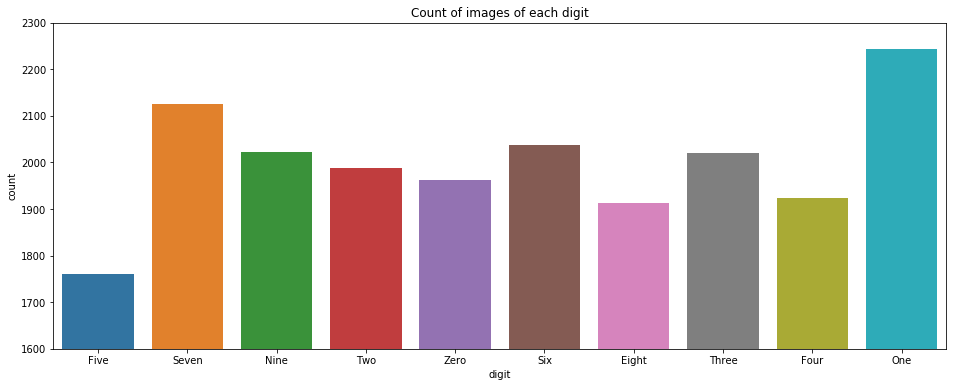

In [133]:
plt.figure(1,figsize=(16,6))
sns.countplot(x=label.digit)
plt.title('Count of images of each digit')
plt.ylim(1600,2300);

In [0]:
stats = ([0.8693],[0.3082])
data = (ImageList.from_df(label,path=path,folder='mnist',suffix='.png',cols='image_id')
                .split_by_rand_pct(0.2,seed=64)
                .label_from_df(cols='digit')
                .transform( size=28, padding_mode='zeros')
                .databunch(bs=128)).normalize(stats)

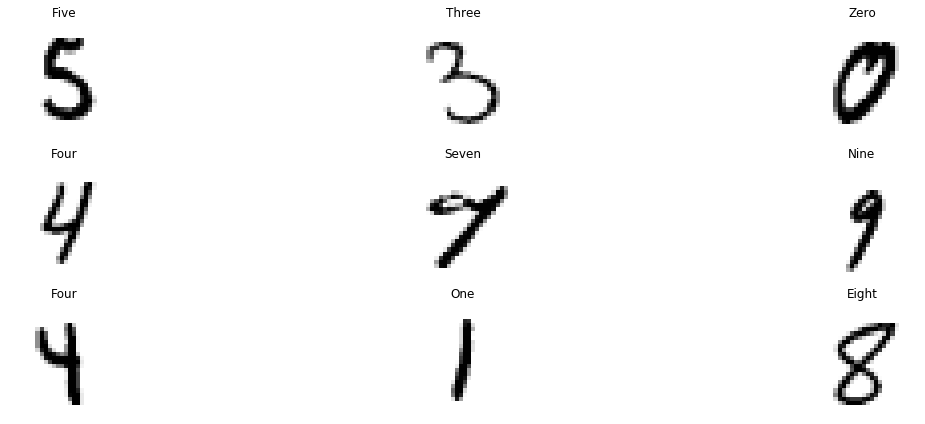

In [141]:
data.show_batch(rows=3,figsize=(20,6))

In [0]:
class ResBlock(nn.Module):
  def __init__(self, nf):
    super().__init__()
    self.conv1 = conv_layer(nf,nf)
    self.conv2 = conv_layer(nf,nf)
  def forward(self, x): 
    return x + self.conv2D(self.conv1(x))



# ni = number of channels in 
# nf = number of channels out
def conv2D(ni,nf):
  return nn.Conv2d(ni,nf,kernel_size=3,stride=2,padding=1)
def conv_and_res(ni,nf): 
	return nn.Sequential(conv2D(ni, nf), res_block(nf))

## Model wit ReLU activation function

In [0]:

modelRelu = nn.Sequential(
    conv_and_res(3, 8),nn.BatchNorm2d(8),nn.ReLU(),nn.Dropout(0.3),
    conv_and_res(8, 16),nn.BatchNorm2d(16),nn.ReLU(),nn.Dropout(0.4),
    conv_and_res(16, 32),nn.BatchNorm2d(32),nn.ReLU(),nn.Dropout(0.3),
    conv_and_res(32, 16),nn.BatchNorm2d(16),nn.ReLU(),nn.Dropout(0.2),
    conv2D(16, 10),
    Flatten()
)

In [0]:
from mish_activation import *

## Model with Mish activation function

In [0]:

modelMish = nn.Sequential(
    conv_and_res(3, 8),nn.BatchNorm2d(8),Mish(),nn.Dropout(0.3),
    conv_and_res(8, 16),nn.BatchNorm2d(16),Mish(),nn.Dropout(0.4),
    conv_and_res(16, 32),nn.BatchNorm2d(32),Mish(),nn.Dropout(0.3),
    conv_and_res(32, 16),nn.BatchNorm2d(16),Mish(),nn.Dropout(0.2),
    conv2D(16, 10),
    Flatten()
)

# Metrics f1_score

In [0]:
fb = FBeta()
fb.average='macro'

In [0]:
learnR = Learner(data, modelRelu, loss_func = nn.CrossEntropyLoss(), metrics=[accuracy,fb]) # Relu activation function used
learnM = Learner(data, modelMish, loss_func = nn.CrossEntropyLoss(), metrics=[accuracy,fb]) # Mish activation function used

In [0]:
learnR.summary()

epoch,train_loss,valid_loss,accuracy,f_beta,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


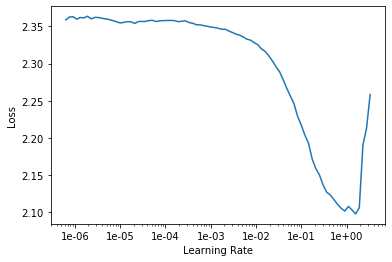

In [112]:
learnR.lr_find()
learnR.recorder.plot()

In [113]:
learnR.fit_one_cycle(4,1e-1,moms=(0.9,0.8))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.923997,0.699749,0.816954,0.807721,00:19
1,0.631793,0.345264,0.891973,0.889498,00:20
2,0.437853,0.204723,0.937484,0.936607,00:20
3,0.302196,0.132677,0.957990,0.957677,00:19


In [114]:
learnM.fit_one_cycle(4,1e-1,moms=(0.9,0.8))

epoch,train_loss,valid_loss,accuracy,f_beta,time
0,0.797593,1.121516,0.757939,0.738204,00:20
1,0.497281,0.364312,0.888972,0.886536,00:20
2,0.338649,0.142201,0.955739,0.955655,00:19
3,0.218017,0.113205,0.965241,0.965323,00:19


In [152]:
interpR = ClassificationInterpretation.from_learner(learnR)
interpM = ClassificationInterpretation.from_learner(learnM)

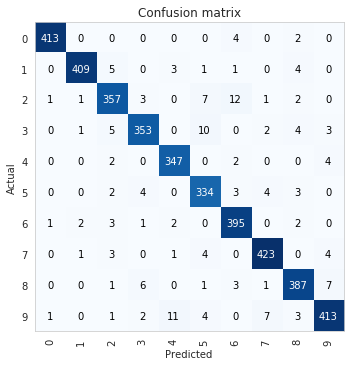

In [172]:
interpR.plot_confusion_matrix(figsize=(5,5))

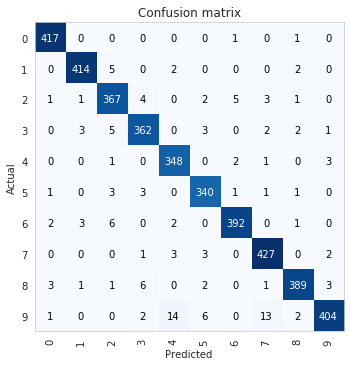

In [171]:
interpM.plot_confusion_matrix(figsize=(5,5))

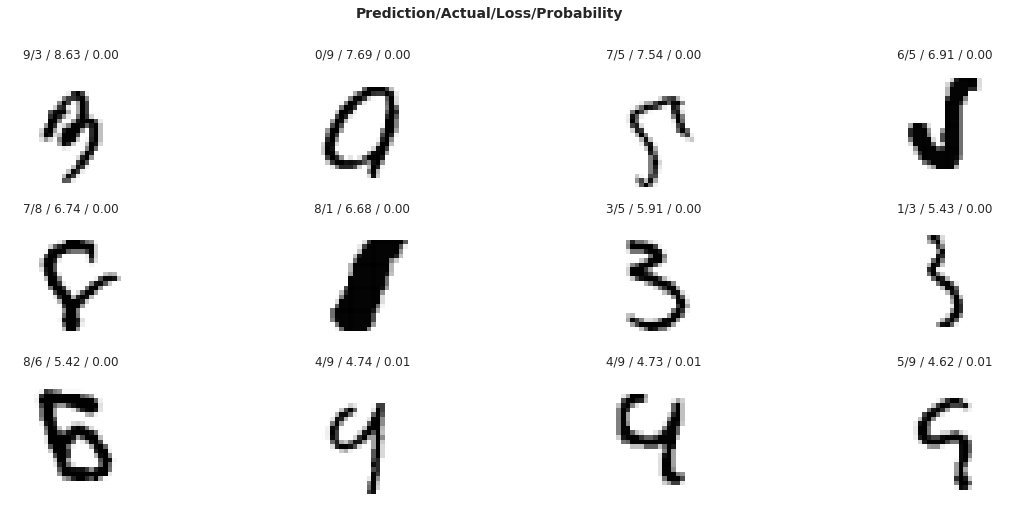

In [165]:
interpM.plot_top_losses(k=12,figsize=(20,8))

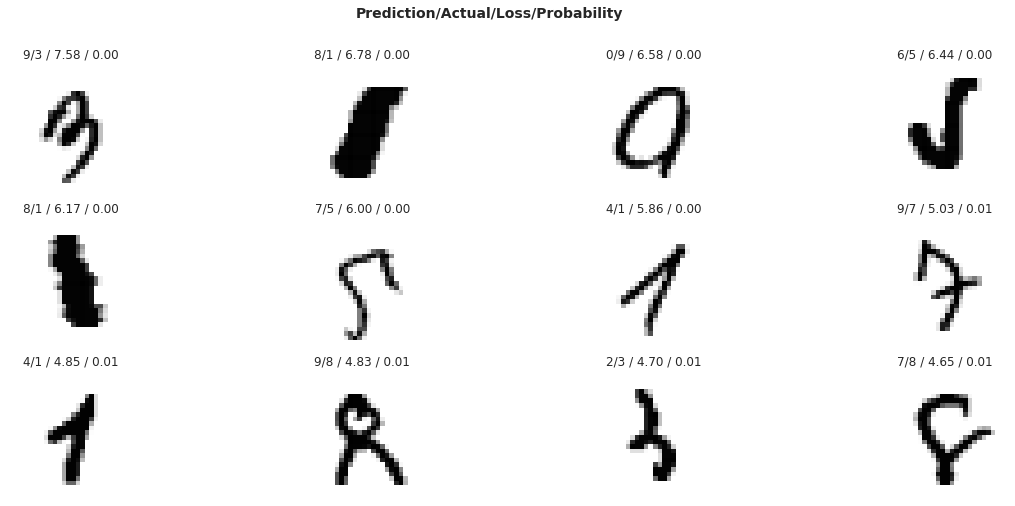

In [166]:
interpR.plot_top_losses(k=12,figsize=(20,8))